# Colorspace Operations on Images

In this tutorial we will take a look at the `cvtColor()` function, and apply it to an example of simple color-based `Object Tracking`.

---

## Standard Imports

In [1]:
import cv2
import numpy as np
from tutorial_utils.utils import *
from matplotlib import pyplot as plt

DATA_DIR = data_dir()

---
## cvtColor()


OpenCV supports more than 150 color space conversions. THe most common ones are BGR $\leftrightarrow$ RGB, BGR $\leftrightarrow$ HSV, BGR $\leftrightarrow$ Gray


OpenCV provides `cv2.cvtColor(input_image, flag)`, where the `flag` determines the type of conversion.

---

## Examples

Here are some examples of colorspace conversions of images.

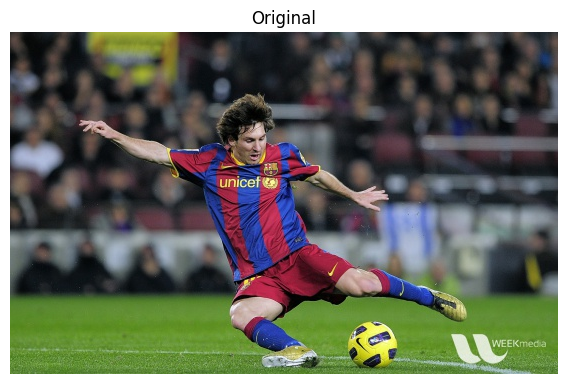

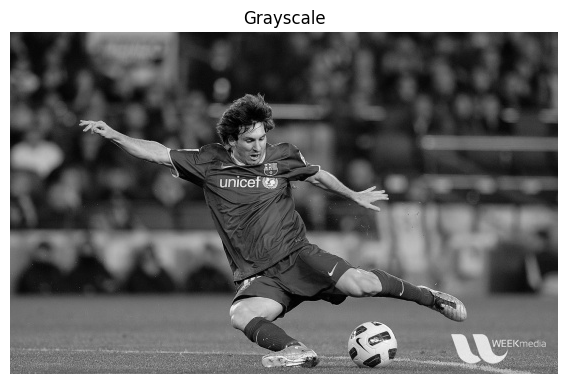

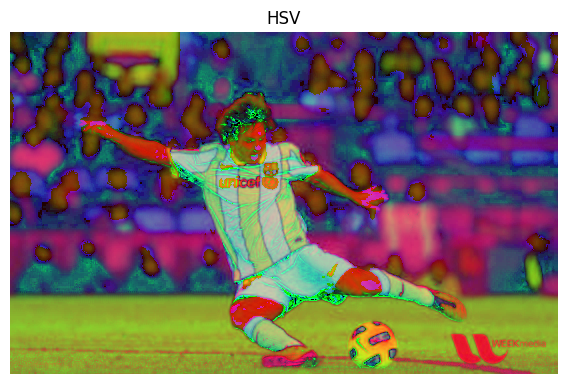

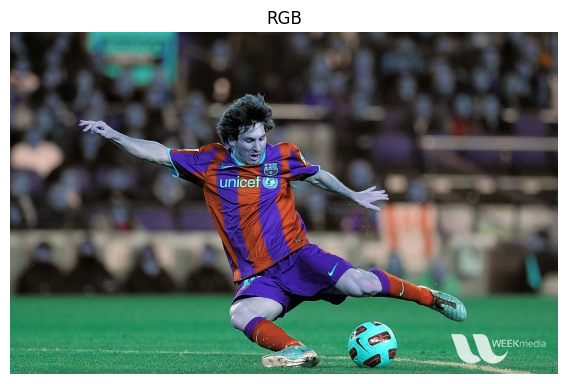

In [8]:
img = cv2.imread(DATA_DIR + 'messi5.jpg')
cv2_imshow(img, "Original")

# Convert BGR to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray, "Grayscale")

# Convert BGR to HSV (Hue, Saturation, Value)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv, "HSV")

# Convert BGR to RGB 
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb, "RGB")



---

## HSV colorspace

HSV (Hue, Saturation, Value) is an interesting color space. In OpenCV, in this color space, the `hue` range is [0, 179], while `saturation` and `value` have the range [0, 255]. 

Note: Different softwares use different scales, so you may need to normalize these ranges if you want to compare OpenCV values with them.

*HSV is preferred for color-based segmentation because it separates the image intensity (`value`) from the color information (`hue` and `saturation`). This makes it easier to filter colors regardless of lighting conditions.*


---

## List of Available Colorspace Conversions

Here is a list of all available `flag`s.

In [9]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_BGGR2BGR',
 'COLOR_BAYER_BGGR2BGRA',
 'COLOR_BAYER_BGGR2BGR_EA',
 'COLOR_BAYER_BGGR2BGR_VNG',
 'COLOR_BAYER_BGGR2GRAY',
 'COLOR_BAYER_BGGR2RGB',
 'COLOR_BAYER_BGGR2RGBA',
 'COLOR_BAYER_BGGR2RGB_EA',
 'COLOR_BAYER_BGGR2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GBRG2BGR',
 'COLOR_BAYER_GBRG2BGRA',
 'COLOR_BAYER_GBRG2BGR_EA',
 'COLOR_BAYER_GBRG2BGR_VNG',
 'COLOR_BAYER_GBRG2GRAY',
 'COLOR_BAYER_GBRG2RGB',
 'COLOR_BAYER_GBRG2RGBA',
 'COLOR_BAYER_GBRG2RGB_EA',
 'COLOR_BAYER_GBRG2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_

---

## Object Tracking Example (Part 1)

In this example, we will create a template for a simple object-tracking algorithm, based on a sample image. 

How do we find the HSV values to track?
* We can create one of the primary colors, like green : `np.uint8([[[0, 255, 0]]])`
* We can apply `cvtColor(green, cv2.COLOR_BGR2HSV)` on it, so that we get the HSV values
* Then we can use H-10, H+10 for hue
* Use Min S, V = 100
* Use Max S, V = 255
* Start tuning from these values.

You can use an external image editing tool like GIMP to obtain these values too, but be sure to adjust the HSV ranges to match that of OpenCV.


The Hue component is relatively stable under varying lighting, but Saturation and Value are highly susceptible to changes in scene illumination. The recommendation is:
* Keep the Hue narrow and centered around the object's specific hue
* The maximum S and V should be near the top of the scale, to capture the bright, highly saturated color in direct sunlight
* The minimum value of V can then be tuned to detect the object in shadows or dim lighting.


Don't worry too much about `inRange` - we will cover this in a later module.


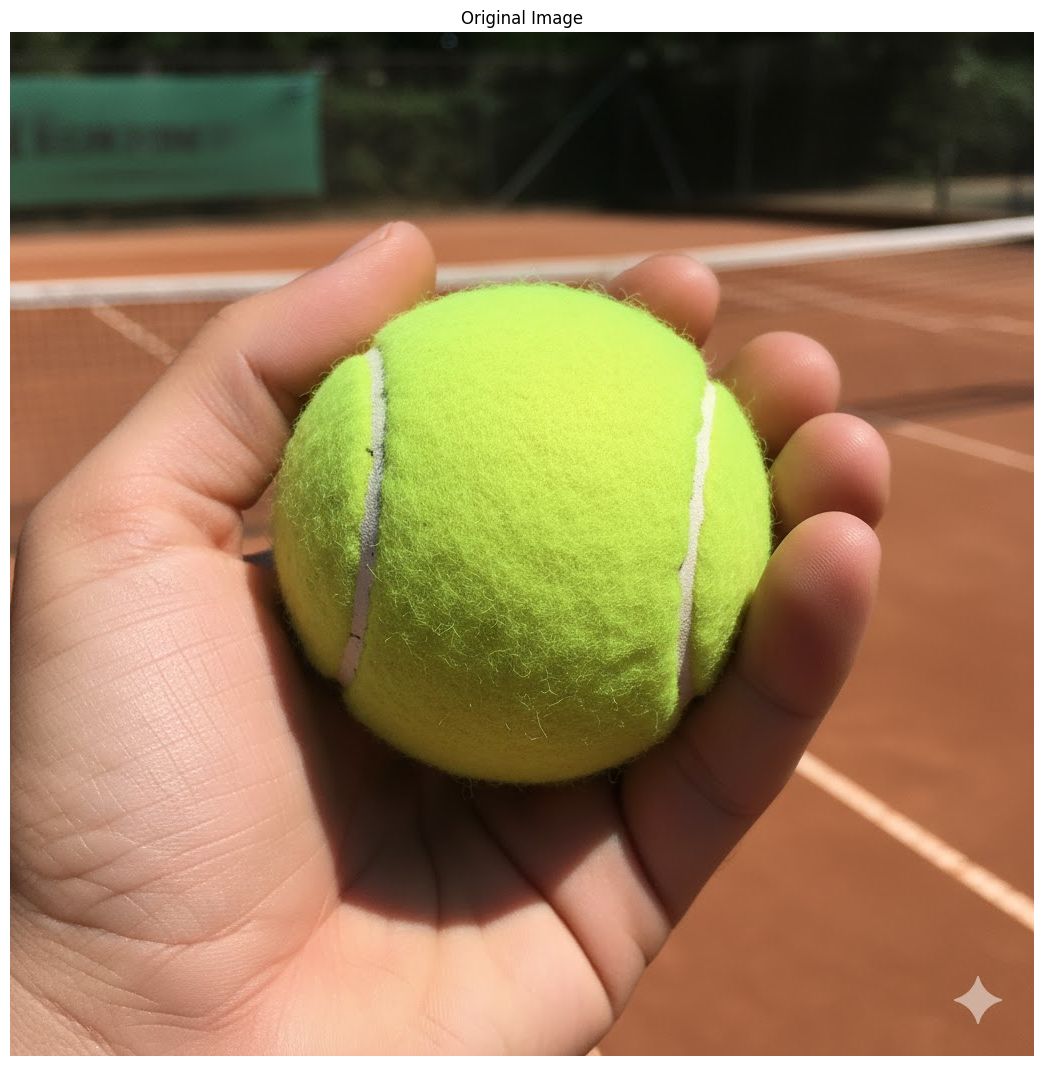

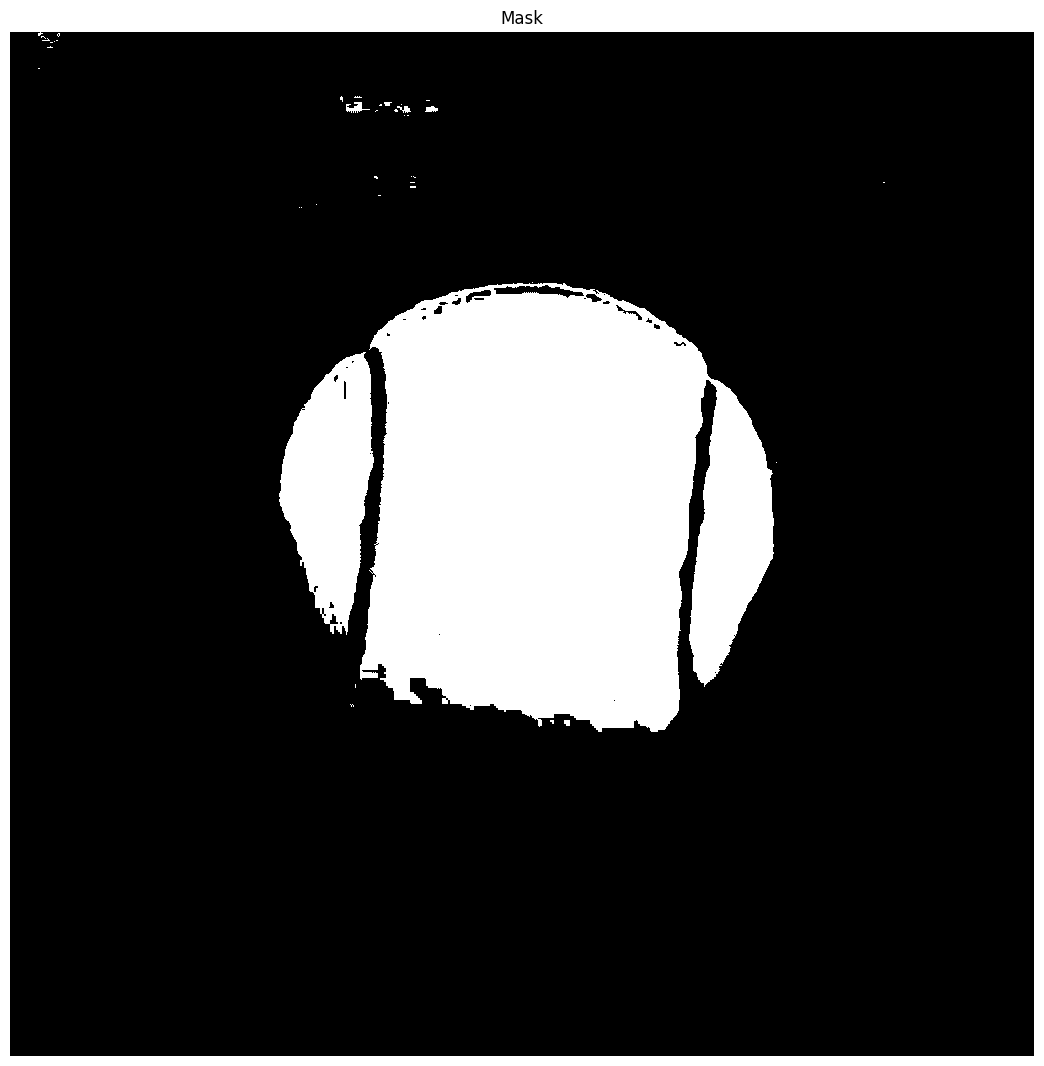

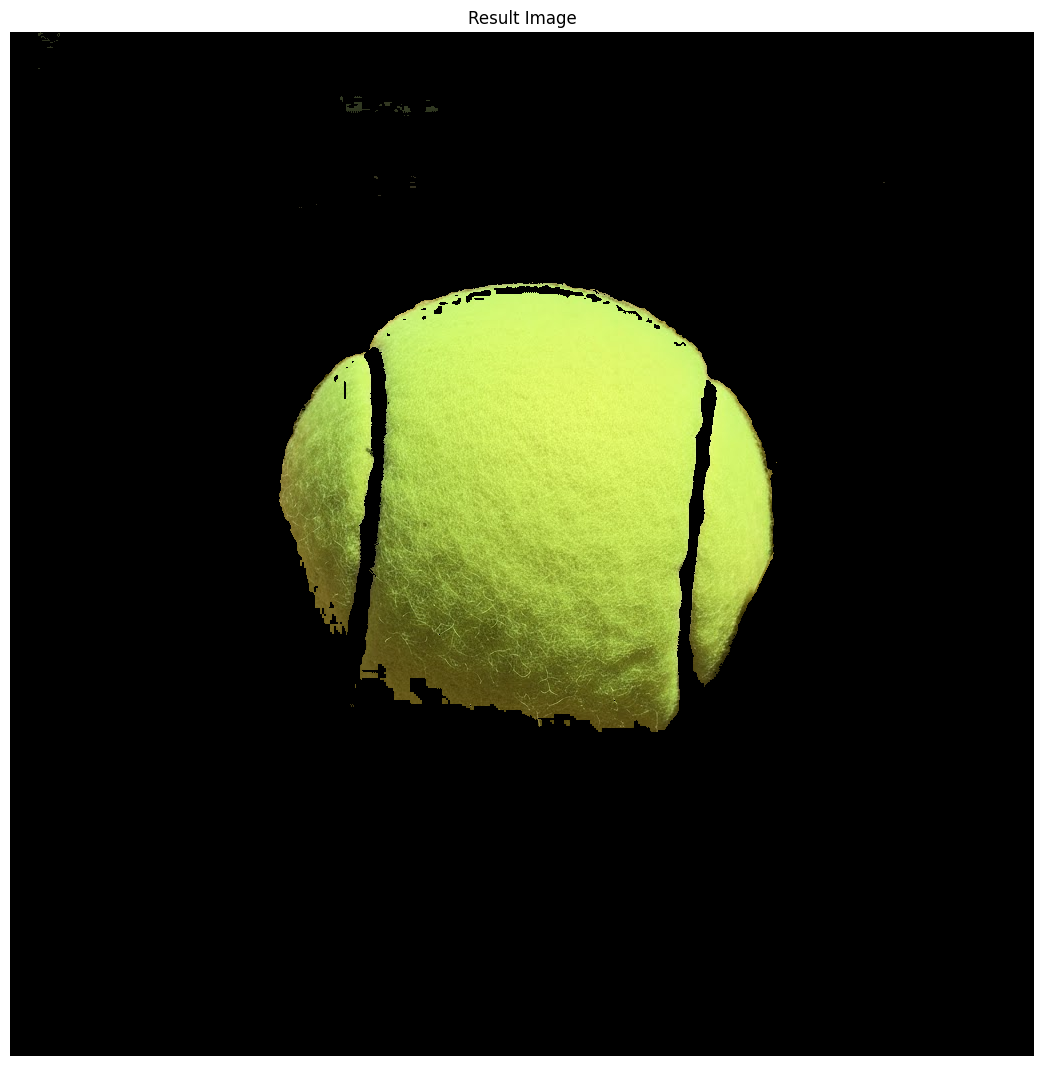

In [17]:
# Load the image
img = cv2.imread(DATA_DIR + 'tennis_ball.jpg')
cv2_imshow(img, "Original Image")

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define range of green color in HSV
lower_green = np.array([25, 100, 51]) # Hue, Saturation, Value
upper_green = np.array([40, 255, 255]) # Hue, Saturation, Value

# Threshold the HSV image to only get green colors
mask = cv2.inRange(hsv, lower_green, upper_green)

cv2_imshow(mask, "Mask")

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(res, "Result Image")


Note that this works well for simple cases only, in that, it is more of a 'track all objects whose colors lie in a given range' algorithm. If you have multiple objects in the scene that satisfy the color range, it will display all such objects.

---

## Object Tracking Example (Part 2)

Now that the algorithm works, we can make a Python script to run it on live video. There are some Trackbars added to allow for live tuning. You can tune it to track objects of any range of colors. This is shown in [`01_Core_Operations/05_simple_object_detection.py`](https://github.com/ankurjay/opencv-python-tutorials/blob/main/01%20Core%20Operations/05_simple_object_detection.py).